<a href="https://colab.research.google.com/github/breshmashri/C117-Confusion-matrix/blob/main/C117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd

df = pd.read_csv("heart.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [3]:
from sklearn.model_selection import train_test_split

age = df["age"]
heart_attack = df["target"]
age_train , age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression

import numpy as np

X = np.reshape(age_train.ravel(), (len(age_train), 1))

Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))

Y_test = np.reshape(heart_attack_test.ravel(), (len(heart_attack_test), 1))

heart_attack_prediction = classifier.predict(X_test)

predict_value = []

for i in heart_attack_prediction:
  if i == 0:
    predict_value.append("No")
  else:
    predict_value.append("Yes")

actual_value = []

for i in Y_test.ravel():
  if i == 0:
    actual_value.append("No")
  else:
    actual_value.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

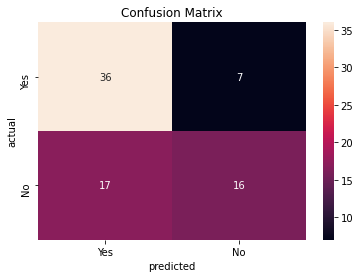

In [6]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Yes", "No"]
cm = confusion_matrix(actual_value, predict_value, labels)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [7]:
accurac = 36+16/36+7+17+16
accurac = 52/76
accurac = 0.68